In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

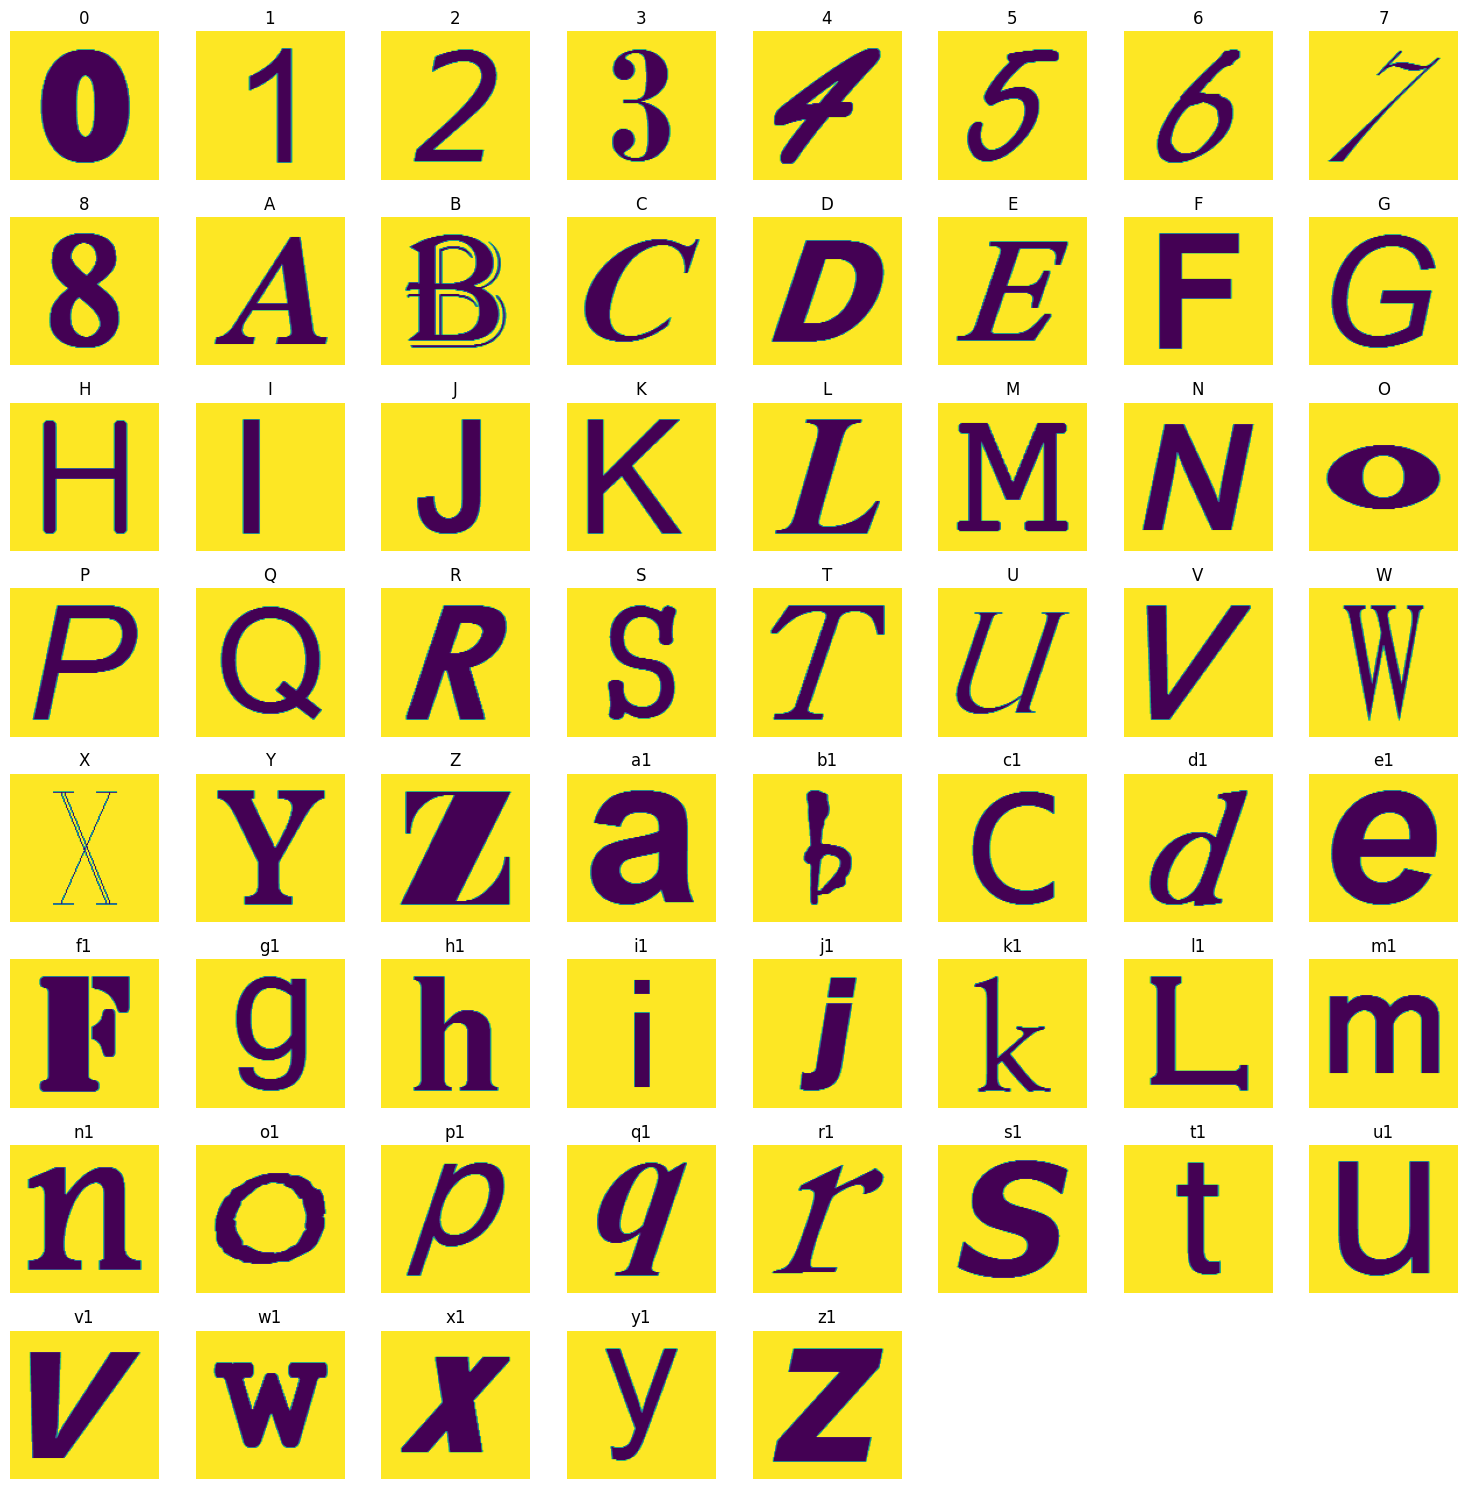

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_one_image_per_class(directory):
    class_names = sorted(os.listdir(directory))
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        image_files = os.listdir(class_path)
        selected_image = random.choice(image_files)
        img_path = os.path.join(class_path, selected_image)
        img = mpimg.imread(img_path)
        
        plt.subplot(8, 8, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_one_image_per_class(r'D:\train')


In [4]:
# Load datasets
train_dataset = image_dataset_from_directory(
    r'D:\train', image_size=(224, 224), batch_size=32
)
val_dataset = image_dataset_from_directory(
    r'D:\valid', image_size=(224, 224), batch_size=32
)
test_dataset = image_dataset_from_directory(
    r'D:\test', image_size=(224, 224), batch_size=32
)

Found 37149 files belonging to 61 classes.
Found 12444 files belonging to 61 classes.
Found 12383 files belonging to 61 classes.


In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Number of classes
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 61)                15677     
Total params: 24,127,933
Trainable params: 540,221
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
1161/1161 [==============================] - 194s 159ms/step - loss: 1.1077 - accuracy: 0.6938 - val_loss: 0.7117 - val_accuracy: 0.7830
Epoch 2/10
1161/1161 [==============================] - 183s 158ms/step - loss: 0.5943 - accuracy: 0.8088 - val_loss: 0.5898 - val_accuracy: 0.8079
Epoch 3/10
1161/1161 [==============================] - 185s 159ms/step - loss: 0.4825 - accuracy: 0.8344 - val_loss: 0.5597 - val_accuracy: 0.8123
Epoch 4/10
1161/1161 [==============================] - 186s 160ms/step - loss: 0.4132 - accuracy: 0.8502 - val_loss: 0.5199 - val_accuracy: 0.8249
Epoch 5/10
1161/1161 [==============================] - 186s 160ms/step - loss: 0.3615 - accuracy: 0.8659 - val_loss: 0.4865 - val_accuracy: 0.8382
Epoch 6/10
1161/1161 [==============================] - 185s 159ms/step - loss: 0.3284 - accuracy: 0.8753 - val_loss: 0.4854 - val_accuracy: 0.8349
Epoch 7/10
1161/1161 [==============================] - 185s 159ms/step - loss: 0.3013 - accuracy: 0.8841 - val_

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')

387/387 [==============================] - 47s 122ms/step - loss: 0.4617 - accuracy: 0.8469
Test accuracy: 0.8468868732452393


In [10]:
import os
def get_class_names(directory):
    return sorted(os.listdir(directory))

class_names = get_class_names(r'D:\train')

Precision: 0.8544
Recall: 0.8469
F1-Score: 0.8420


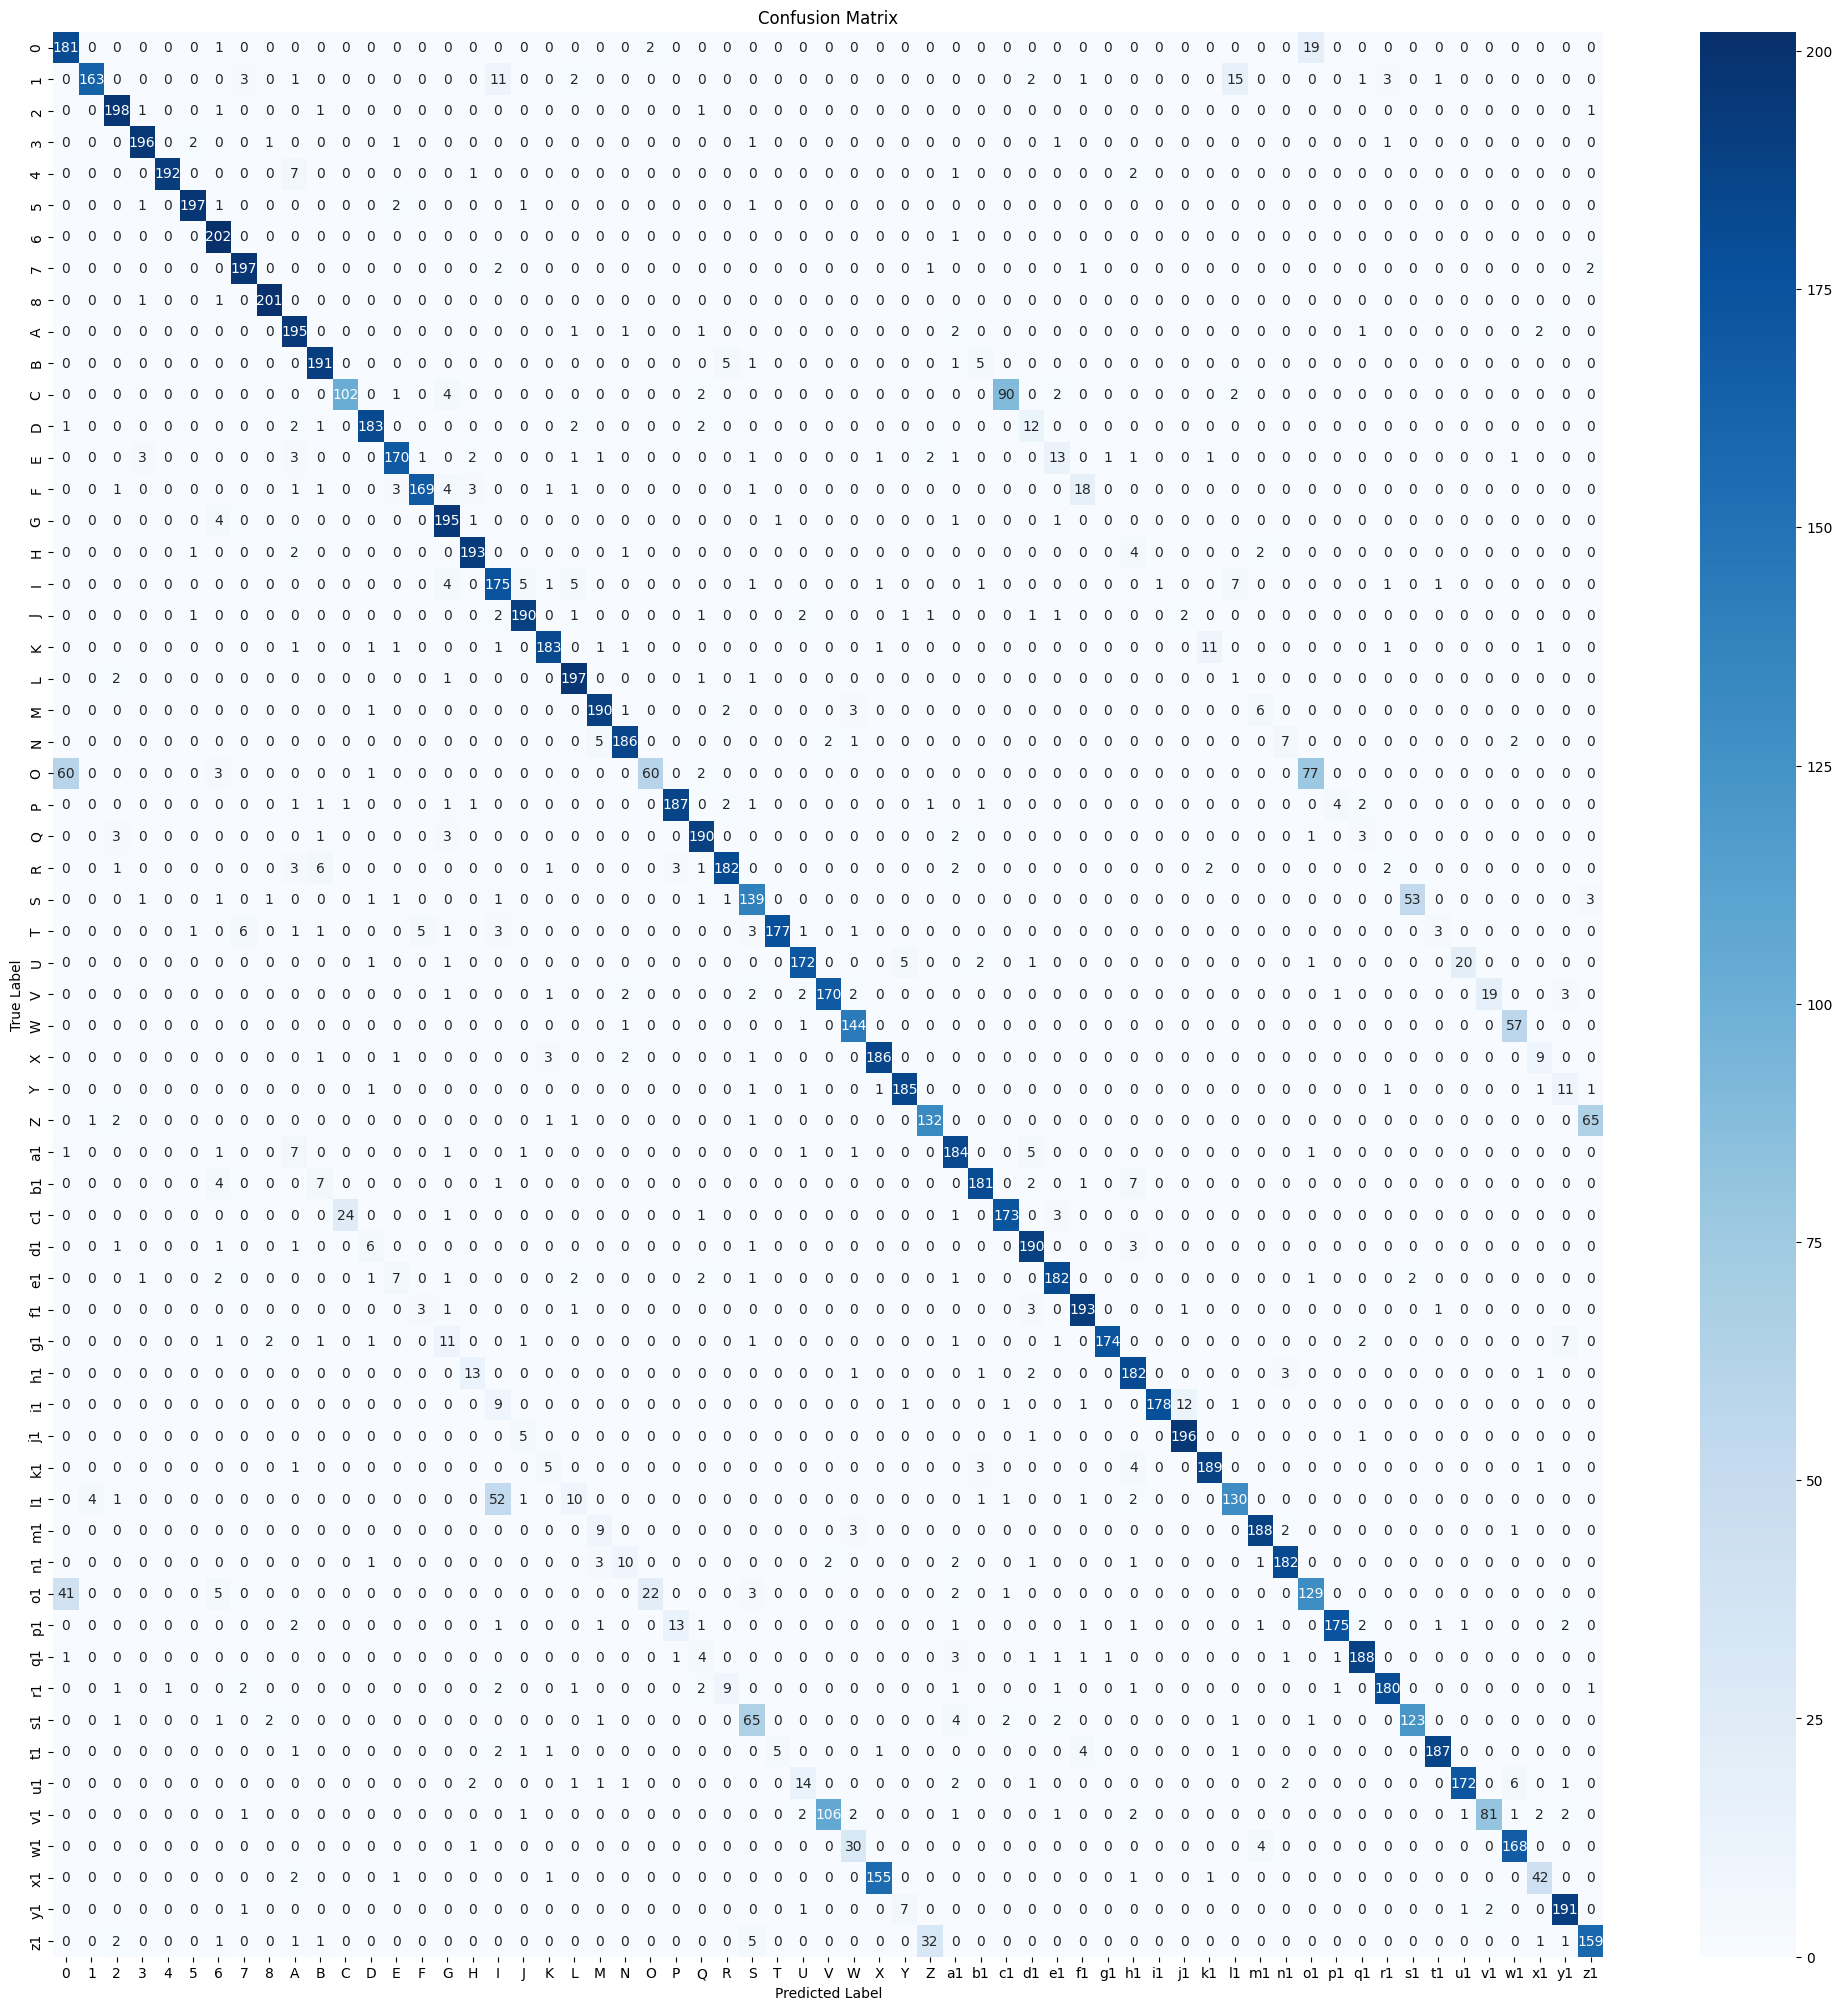

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
def calculate_metrics(model, test_data, class_names):
    y_true = []
    y_pred = []

    for images, labels in test_data:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(tf.argmax(preds, axis=1).numpy())

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))    

    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    
    plt.figure(figsize=(25, 25))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=True, vmin=0, vmax=np.max(cm))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

calculate_metrics(model, test_dataset, class_names)